# **Side Python DS studies**
# Project 1, Titanic Dataset

In [2]:
# Importing the famous Titanic Dataset, specifically the seaborn version as for simplicity
# Import seaborn and pandas
import seaborn as sns
import pandas as pd

# Dataset loading
df = sns.load_dataset("titanic")
# Show first five items in table
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
# Dataframe info
df.info()
df.describe()
df.isna().sum()

# We can see that (1) the dataset has 891 rows and 15 columns, (2) the many columns represent the many characteristics of the passengers,
# and (3) the "age", "embarked", "deck" and "embark_town" variables have missing values.

# Something that might affect survival is the age of the passenger, or the gender if we keep in mind the women and children conduct.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   survived          891 non-null    int64   
 1   pclass            891 non-null    int64   
 2   sex               891 non-null    object  
 3   age               714 non-null    float64 
 4   sibsp             891 non-null    int64   
 5   parch             891 non-null    int64   
 6   fare              891 non-null    float64 
 7   embarked          889 non-null    object  
 8   class             891 non-null    category
 9   who               891 non-null    object  
 10  adult_male        891 non-null    bool    
 11  deck              203 non-null    category
 12  embark_town       889 non-null    object  
 13  alive             891 non-null    object  
 14  alone             891 non-null    bool    
 15  age_group_by_ten  714 non-null    category
dtypes: bool(2), category(3), f

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


/tmp/ipython-input-1668630232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sex", y="survived", data = df, palette = "coolwarm")


<Axes: xlabel='sex', ylabel='survived'>

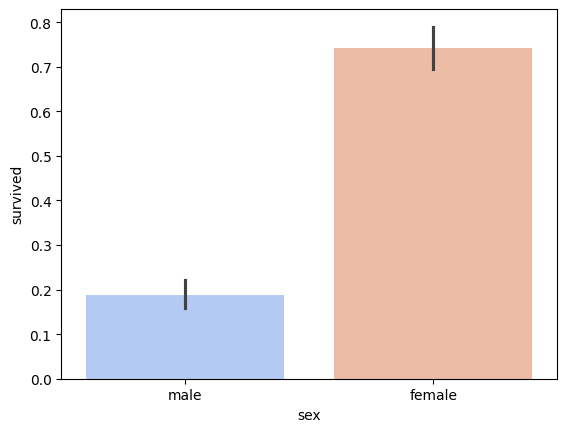

In [32]:
# First exercise, Survival rate per sex
sns.barplot(x="sex", y="survived", data = df, palette = "coolwarm")

# We can see that women had a significantly higher survival rate than men.

/tmp/ipython-input-1644919696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="class", y="survived", data = df, palette = "pastel")


<Axes: xlabel='class', ylabel='survived'>

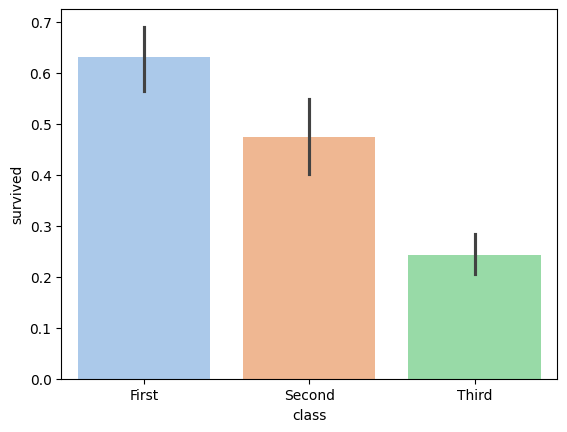

In [5]:
# Second exercise, Survival rate per class
sns.barplot(x="class", y="survived", data = df, palette = "pastel")

# As the plot shows, passengers on the first class had a higher survival rates, followed by second and then third.
# This might suggest a priority in evacuation.

/tmp/ipython-input-1971055575.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="age_group_by_ten", y="survived", data = df, palette = "viridis")


<Axes: xlabel='age_group_by_ten', ylabel='survived'>

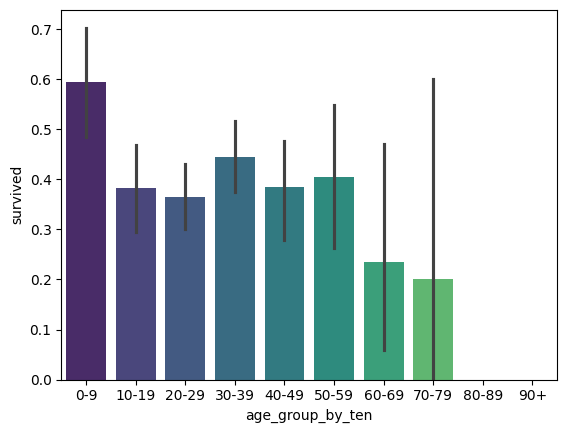

In [12]:
# Third exercise, survival rate per age
# Defines groups of 10 years for the graph's simplicity
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90+"]

# Cuts the ages and categorizes by group
df["age_group_by_ten"] = pd.cut(df["age"], bins = age_bins, labels = age_labels)

sns.barplot(x="age_group_by_ten", y="survived", data = df, palette = "viridis")

# As we can see in the plot, children had the highest survival rate, followed by middle-aged people.
# People older than 80yrs had no survival rate.

<Axes: xlabel='age_group_by_ten', ylabel='survived'>

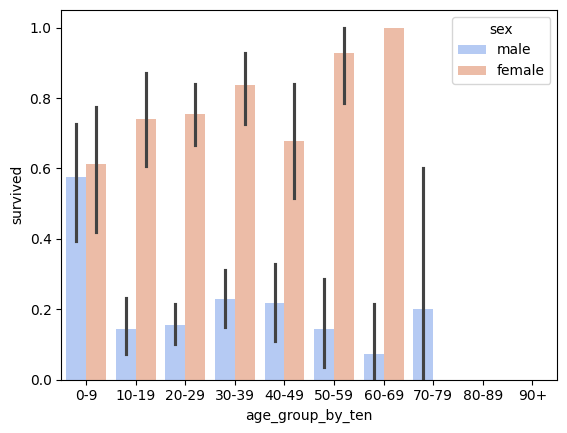

In [29]:
# Extra challenge plot
# Consider the "women and children first" hypothesis - Your plot should clearly show if this was true!

# We know the survival rate depending both on gender and age, but let's make it clearer in a single graph:

# Barplot that shows the survival rate by gender and age
sns.barplot(x="age_group_by_ten", y="survived", hue = "sex",
            palette="coolwarm",
            data = df)

# We can see that the "women and children first" "hypothesis" is pretty much correct.
# The barplot shows that women have a way higher survival rate than men, who only have a high-ish survival rate in young ages.